<a href="https://colab.research.google.com/github/shravanc/tf/blob/master/imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Creating a Valid Dataset

In [5]:
df = pd.DataFrame({'numeric': [3, 5, 5, 2.6, 3.5, 4.1, 6, 3, 2.1, 2,4]})
df

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [6]:
df.describe()

,numeric
count,11.000000
mean,3.663636
std,1.287845
min,2.000000
25%,2.800000
50%,3.500000
75%,4.550000
max,6.000000


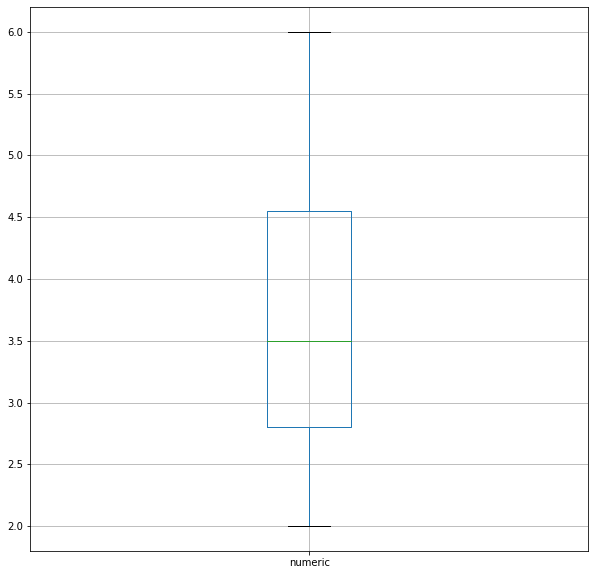

In [12]:
df.boxplot(figsize=(10,10))

# Now will introduce an outlier in the Dataset. From the above boxplot it is clear that there is no outlier and the data is fine shine.

Also we will try with two scaler techniques for understandin the which techniques is best for outliers.

In [13]:
df_outlier = pd.DataFrame({'numeric': [3, 5, 5, 2.6, 3.5, 4.1, 6, 3, 2.1, 2,4, 50]})
df_outlier

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [15]:
df_outlier.describe()

,numeric
count,12.000000
mean,7.525000
std,13.432398
min,2.000000
25%,2.900000
50%,3.750000
75%,5.000000
max,50.000000


###  From the above we can see that there is huge difference between max and the percentile values(25%, 50% and 75%). One indication of having an outlier. Outlier is basically few data entry which stands out from others. In simple term, in group of 10 if we explain ML for first time, one person with previous experience might understand but rest are left with no clue. So person who understand is an outlier.

Ploting the boxplot

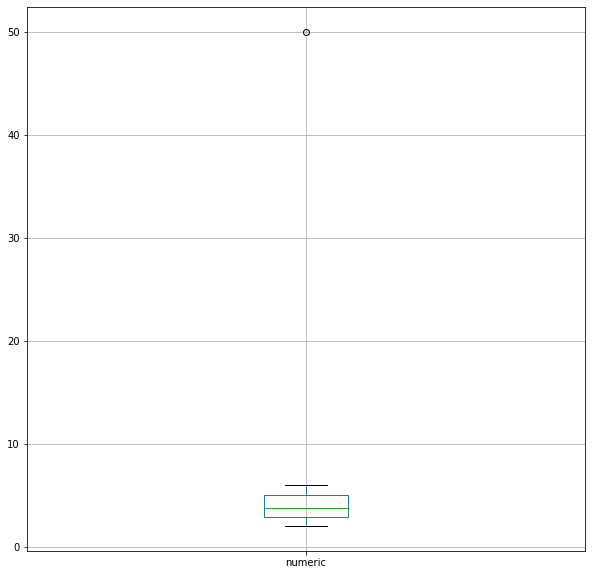

In [18]:
df_outlier.boxplot(figsize=(10,10))

## We can see from above there is a dot at the top, an indication of an outlier.

Now lets apply MinmaxScaler first and then we will apply RobustScaler from sklearn preprocessing techniques.

In [0]:
minmax_df = df_outlier.copy()
scaler = StandardScaler()
minmax_df['numeric'] = scaler.fit_transform(minmax_df)

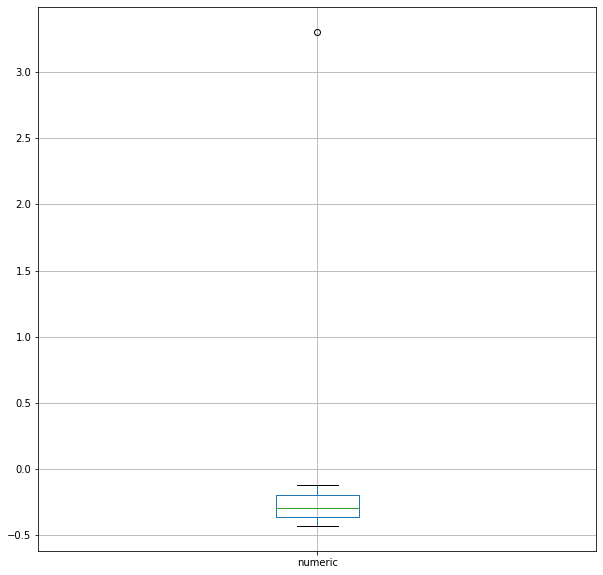

In [33]:
minmax_df.boxplot(figsize=(10,10))

Now we will apply RobustScaler

In [0]:
scaler = RobustScaler()

robust_df = df_outlier.copy()
robust_df['numeric'] = scaler.fit_transform(robust_df)

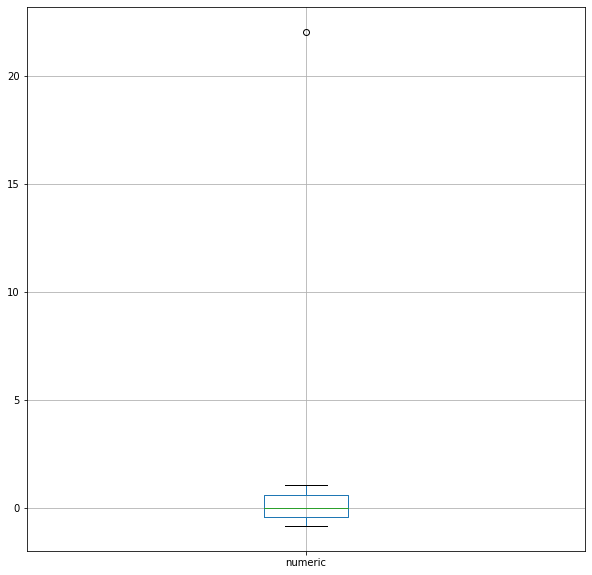

In [35]:
robust_df.boxplot(figsize=(10,10))

In [36]:
minmax_df.describe()

,numeric
count,1.200000e+01
mean,-7.401487e-17
std,1.044466e+00
min,-4.296086e-01
25%,-3.596271e-01
50%,-2.935335e-01
75%,-1.963370e-01
max,3.302738e+00


In [37]:
robust_df.describe()

,numeric
count,12.000000
mean,1.797619
std,6.396380
min,-0.833333
25%,-0.404762
50%,0.000000
75%,0.595238
max,22.023810


It is suggested to use Robust scaler in the presence of Outliers. In RobustScaler the centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Details can be found in below URL:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# Now will introduce a missing value and See how it can be addressed.

In [38]:
missing_df = pd.DataFrame({'numeric': [3, 5, 5, 2.6, 3.5, 4.1, 6, 3, 2.1, 2,4, np.nan, 7.8, 8.9, 10, 7.2, 3.4, 5, 2,9]})
missing_df

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


In [40]:
missing_df.describe()

,numeric
count,19.000000
mean,4.926316
std,2.544895
min,2.000000
25%,3.000000
50%,4.100000
75%,6.600000
max,10.000000


checking empty values

In [41]:
missing_df.isna().sum()

numeric    1
dtype: int64

so one value is missing

## Method one imputation. Strightforward imputation with mean value.

In [43]:
missing_df['numeric'].fillna(missing_df['numeric'].median(), inplace=True)
missing_df

,numeric
0,3.0
1,5.0
2,5.0
3,2.6
4,3.5
5,4.1
6,6.0
7,3.0
8,2.1
9,2.0


As we can see 11th row is now imputed with median value i.e. 4.0

But, imputing missing values with the median may introduce bias in the dataset. A better method is to build an ML model (typically, kNN).

# ML way of data imputation 

In [0]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [0]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [0]:
k = 2

In [0]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(missing_df)

In [0]:
data_and_centers = np.r_[missing_df,clustered_data_sklearn.cluster_centers_]

In [65]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


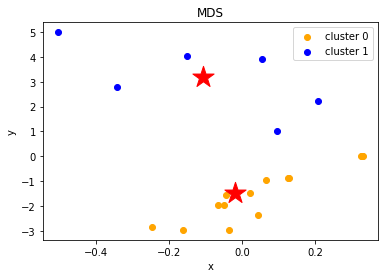

In [66]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [67]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


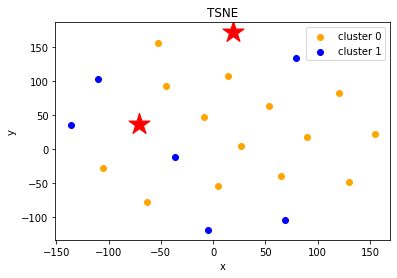

In [68]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

Cluster Analysis

In [76]:
missing_df.index

RangeIndex(start=0, stop=20, step=1)

In [0]:
missing_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=missing_df.index)


In [79]:
missing_df

,numeric,cluster
0,3.0,0
1,5.0,0
2,5.0,0
3,2.6,0
4,3.5,0
5,4.1,0
6,6.0,1
7,3.0,0
8,2.1,0
9,2.0,0


In [80]:
missing_df.groupby('cluster').median()

,numeric
cluster,
0,3.45
1,8.35


In this way we can impute data with median values of the type of cluster it belongs to. This will eliminate the bias to the dataset